In [1]:
import numpy as np
import scipy
import scipy.ndimage.filters
import matplotlib.pyplot as plt


In [2]:
xtick_marks = list(range(0, 181, 15))
xtick_label = list(range(0, 13, 1))

In [3]:
def plot_gaussian_blur_with_center_x(m, m_blur= None, name=None):
    
    plt.figure(figsize=(10, 10))
    
    # plt.xticks([0, 15, 30, 45, 60, 75, 90], size=20)
    if m_blur is not None: # there are blur
        mxy = np.argwhere(m == 1).T
        plt.scatter(mxy[0], mxy[1], marker='x', color="black")
        plt.imshow(m_blur.T, cmap='jet', interpolation='nearest')
        plt.xticks(xtick_marks, xtick_label, size=20)
        plt.yticks(xtick_marks, reversed(xtick_label), size=20)
    else: # there are no blur
        m = np.flip(m, 1)
        mxy = np.argwhere(m == 1).T
        plt.scatter(mxy[0], mxy[1], marker='x', color="black")
        plt.xticks(xtick_marks, xtick_label, size=20)
        plt.yticks(xtick_marks, xtick_label, size=20)
    if name is not None:
        plt.savefig("./crowd_counting/" + name+".png", dpi=300)
    plt.show()

In [4]:
def create_point_with_blur(x, y):
    m = np.zeros((181, 181))
    m[x*15, (12-y)*15] = 1
    m_blur = scipy.ndimage.filters.gaussian_filter(m, 15)
    return m, m_blur

In [5]:
# def plot(x, y):
#     # for plot point only
#     p1, _ = create_point_with_blur(x, y)
#     # for point and gaussian 
#     p2, b2 =  create_point_with_blur(x, 12 - y)
#     plot_gaussian_blur_with_center_x(p1, b2)

In [6]:
m1 = np.zeros((181, 181))
m1[60, 60] = 1
# get the indices where data is 1
m1_blur = scipy.ndimage.filters.gaussian_filter(m1, 15)

m2 = np.zeros((181, 181))
m2[90, 90] = 1
m2_blur = scipy.ndimage.filters.gaussian_filter(m2, 15)

m3 = np.zeros((181, 181))
m3[150, 150] = 1
m3_blur = scipy.ndimage.filters.gaussian_filter(m3, 15)

In [7]:
m1, m1_blur = create_point_with_blur(3, 8)
m2, m2_blur = create_point_with_blur(6, 5)
m3, m3_blur = create_point_with_blur(3, 5)



# Vẽ các điểm 

Giả sử ta có 3 điểm đánh nhãn 

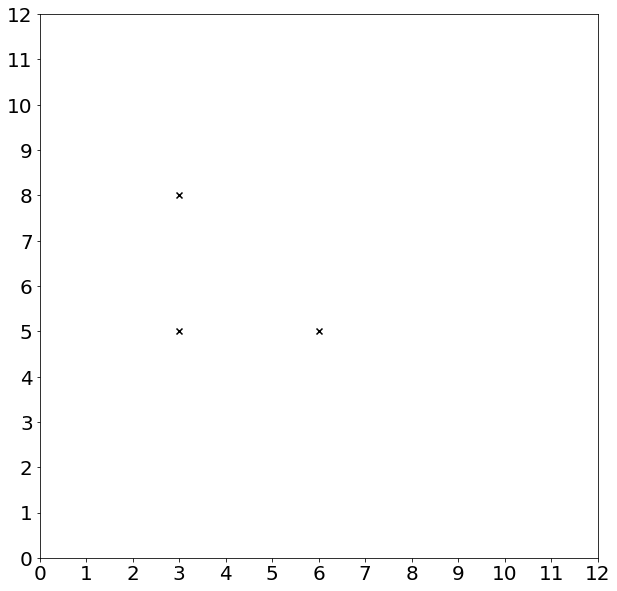

In [8]:
plot_gaussian_blur_with_center_x(m1+m2+m3, None, "p123noblur")

Giả sử ta tạo ra 3 ảnh, mỗi ảnh chỉ có 1 label 

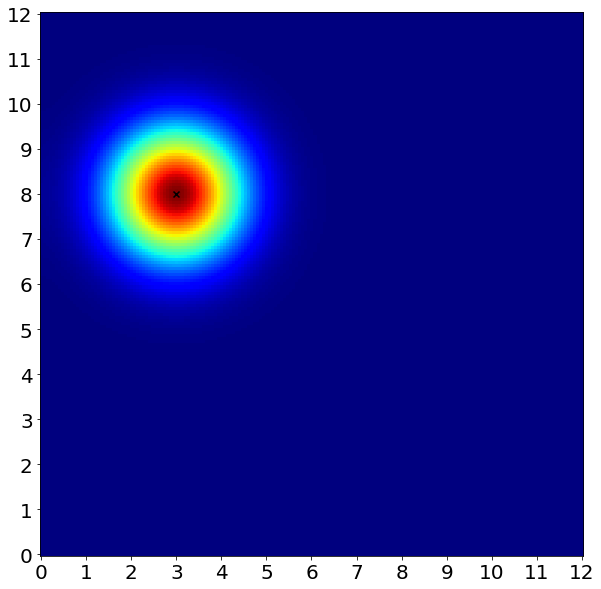

In [13]:
plot_gaussian_blur_with_center_x(m1,  m1_blur, "p1")

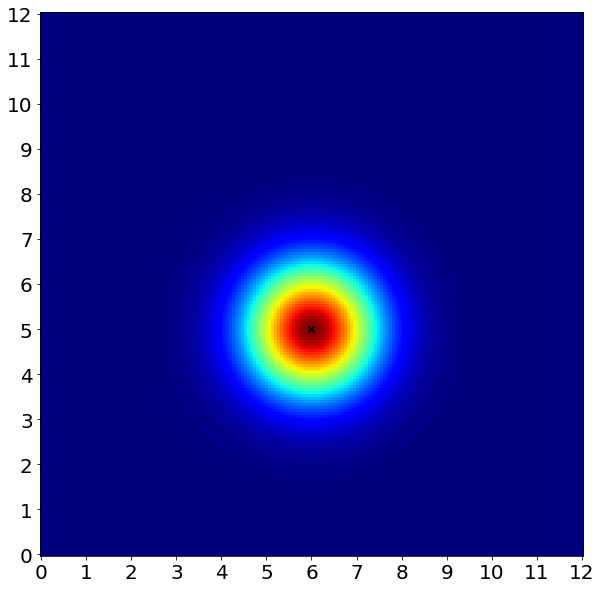

In [14]:
plot_gaussian_blur_with_center_x(m2,  m2_blur, "p2")

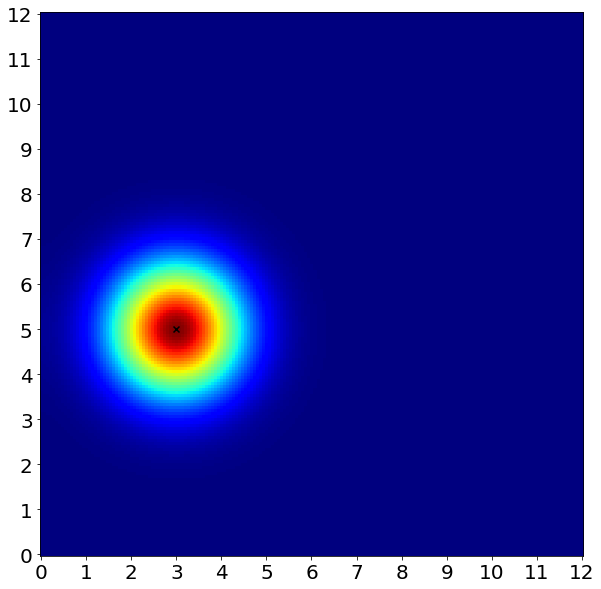

In [15]:
plot_gaussian_blur_with_center_x(m3,  m3_blur, "p3")

Kết hợp lại theo phép cộng 

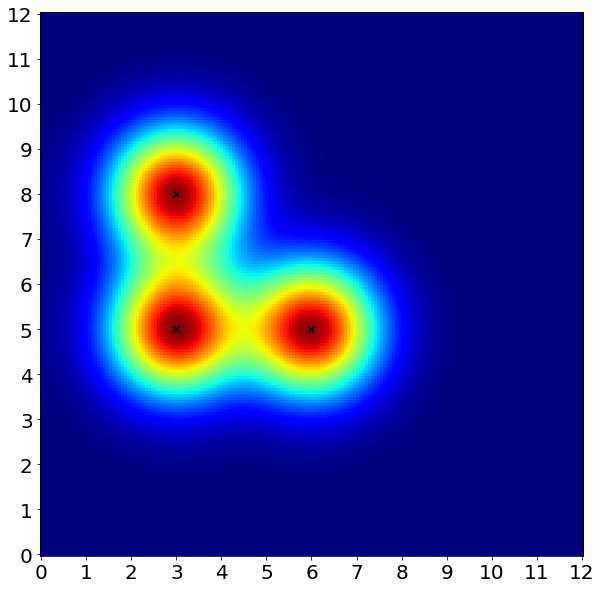

In [12]:
plot_gaussian_blur_with_center_x(m1+m2+m3,  m1_blur + m2_blur + m3_blur, "p123")

# Thử xem có thể crop cái filter theo 3 sigma được không ?

In [19]:
def create_point_with_blur_t(x, y, truncate_by_sd):
    m = np.zeros((181, 181))
    m[x*15, (12-y)*15] = 1
    m_blur = scipy.ndimage.filters.gaussian_filter(m, 15, truncate=truncate_by_sd)
    return m, m_blur

In [20]:
mt1, mt1_blur = create_point_with_blur_t(6, 6, 1)

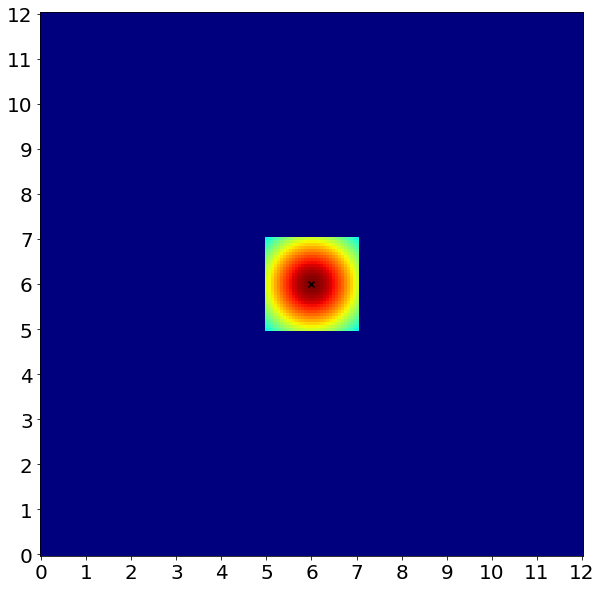

In [21]:
plot_gaussian_blur_with_center_x(mt1,  mt1_blur, None)

In [22]:
mt2, mt2_blur = create_point_with_blur_t(6, 6, 2)

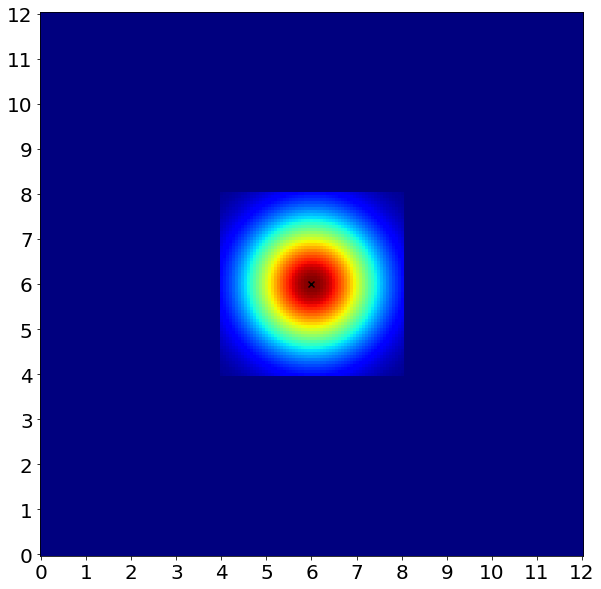

In [23]:
plot_gaussian_blur_with_center_x(mt2,  mt2_blur, None)

In [24]:
mt3, mt3_blur = create_point_with_blur_t(6, 6, 3)

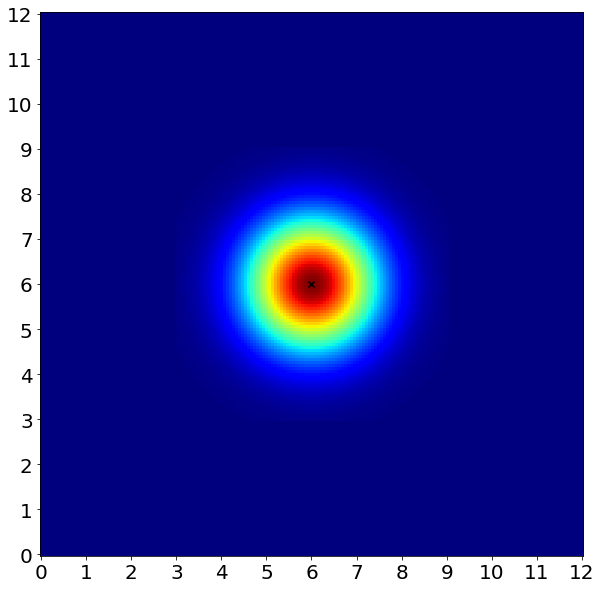

In [25]:
plot_gaussian_blur_with_center_x(mt3,  mt3_blur, None)